# RO47002 Machine Learning for Robotics
* (c) TU Delft, 2020
* Period: 2020-2021, Q1
* Course homepage: https://brightspace.tudelft.nl/d2l/home/318952

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Moreover, if you see an empty cell, please DO NOT delete it, instead run that cell as you would run all other cells. Please fill in your name(s) and other required details below:

In [1]:
GROUP_NUMBER = "8"
STUDENT_NAME1 = "Rishabh Singh Jakhar"
STUDENT_NUMBER1 = "4779819"
STUDENT_NAME2 = "Shantanu Shivankar"
STUDENT_NUMBER2 = "5032814"

In [2]:
# Note: this block is a check that you have filled in the above information.
# It will throw an AssertionError until all fields are filled
assert(GROUP_NUMBER != "")
assert(STUDENT_NAME1 != "")
assert(STUDENT_NUMBER1 != "")
assert(STUDENT_NAME2 != "")
assert(STUDENT_NUMBER2 != "")

### General announcements

* Do *not* share your solutions, and do *not* copy solutions from others. By submitting your solutions, you claim that you and your lab partner alone are responsible for this code.

* Do *not* email questions directly, since we want to provide everybody with the same information and avoid repeating the same answers. Instead, please post your questions regarding this assignment in the correct support forum on Brightspace, this way everybody can benefit from the response. If you do have a particular question that you want to ask directly, please use the scheduled practicum hours to ask a TA.

* There is a strict deadline for each assignment. Students are responsible to ensure that they have uploaded their work in time. So, please double check that your upload succeeded to the Brightspace and avoid any late penalties.

* This [Jupyter notebook](https://jupyter.org/) uses `nbgrader` to help us with automated tests. `nbgrader` will make various cells in this notebook "uneditable" or "unremovable" and gives them a special id in the cell metadata. This way, when we run our checks, the system will check the existence of the cell ids and verify the number of points and which checks must be run. While there are ways that you can edit the metadata and work around the restrictions to delete or modify these special cells, you should not do that since then our nbgrader backend will not be able to parse your notebook and give you points for the assignment. You are free to add additional cells, but if you find a cell that you cannot modify or remove, please know that this is on purpose.

* This notebook will have in various places a line that throws a `NotImplementedError` exception. These are locations where the assignment requires you to adapt the code! These lines are just there as a reminder for youthat you have not yet adapted that particular piece of code, especially when you execute all the cells. Once your solution code replaced these lines, it should accordingly *not* throw any exceptions anymore.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

---

# week 5

* Topic: Dimensionality reduction, clustering
* Year: 2020-2021
* Book chapters: 8, 9

## Introduction

This lab assignment consists of two parts.

**This is Part 1 - Dimensionality Reduction**

We mostly focus on Principal Component Analysis (PCA)

* Understainding PCA transformations using on a 3D toy dataset
* Implementing PCA project and reconstruction yourself
* Using PCA for data compression
* Using PCA on a real Pedestrian image dataset, and computing the "Eigen-Pedestrians"

Part 2 will focus on clustering.

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
import ipywidgets
from IPython.display import display

## PCA on 3D Toy Data

We will first create a small 3D "toy" dataset to investigate PCA as a dimensionality reduction technique.
We'll  treat this data just as samples from some distribution over the 3D feaure space.

For now, we will not consider that different samples have different class labels.
There could be various reasons why we would want to consider PCA to consider such a data distribution. For instance:
- these could all be samples from the same class and we want to understand how to model the class-conditional distribution in a Bayesian classifier
- we might know that these will be samples from mulitple classes, but we just do not know the class labels yet (maybe these still need to be annotated) but sill wish to compress the dataset size
- we might want to create a 2D plot of the samples, so we can get an intuition of the data in the higher dimensional space. E.g. maybe we can already determine if the classes are easily separable or not, and how their data is distributed (e.g. is the distribution skewed, symmetric, uncorrelated, etc.). A word of caution though: if they classes are easily separable in the 2D plot after a linear projection, they'll also be seperable by a linear classifier in the original higher dimensional space; However if they are not easily separable in 2D space, they could be seperable in a 2+ dimensional space, so this doesn't give a definitive answer.

Our goal here is to use understand how PCA preserves the variance of the data by projecting to a lower dimensional space, and how we can perform the inverse projection from this projection back to the original 3D space to reconstruct the original data.

### Create and explore the 3D toy dataset

The block below create the dataset

In [5]:
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
mask = (y != 0)
X = X[mask,:]
y = y[mask]

# make data a bit more interesting
X = X[:,:3] # only use 3 dimensions
X[:,1] *= 0.3 # scale down 2nd dimension
X[:,0] += X[:,1] * 0.8
X[:,2] *= 1.5

y = (y == 2).astype(np.int)

How could determine which features are correlated, and what features contain most of the variance in the data? One way is to compute and report some statistics on the features.

Use the code block below the compute the variance of each feature.

In [6]:
# Compute the variance of each feature, and print them to the output for instance.
# You'll use the result to answer the question in the next code block.

# YOUR CODE HERE
variance = np.var(X,axis=0)
print(variance)
#raise NotImplementedError()

[0.49931916 0.00986544 1.518219  ]


Based on your calculations, order the 3 features from most to least variance.

Use the variable `FEATURE_ORDER_MOST_TO_LEAST_VARIANCE` to give your answer by listing the feature dimensions (0, 1, 2) in order of decreasing variance.
For instance, if you answer that feature 0 has most variance, feature 1 the second most, and feature 2 the least variance, answer: `FEATURE_ORDER_MOST_TO_LEAST_VARIANCE = [0, 1, 2]`

In [7]:
# replace the -1s here and put the numbers 0, 1, 2 in the right order
FEATURE_ORDER_MOST_TO_LEAST_VARIANCE = [-1, -1, -1]

# YOUR CODE HERE
FEATURE_ORDER_MOST_TO_LEAST_VARIANCE = [2,0,1]
#raise NotImplementedError()

In [8]:
# ensure all numbers 0, 1, 2 occur once in your answer
assert(len(FEATURE_ORDER_MOST_TO_LEAST_VARIANCE) == 3)
assert(np.all(np.bincount(FEATURE_ORDER_MOST_TO_LEAST_VARIANCE) == [1,1,1]))


The statistics are useful, but don't show the structure of the samples directly.

Since this is a 3D dataset, we can also try to visualize all 3 features at once in a 3D plot
which can be rotated around to better understandin the underlying structure.
The provided code below sets up the [3D plotting interface of matplotlib](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html), and uses the ipython widgets to allow you to adapt the viewing angle and see the data from different perspectives.

In [9]:
from mpl_toolkits.mplot3d import axes3d

def make_3d_plot_axes_equal(ax):
    """ Utility function to make axes equally scaled for 3D plots in matplotlib.
        Note that for 2D plots we can simply use ax.axes('equal'),
        but unfortunately this doesn't work for 3D plots, so we use this utility function.
        
        Inspired by: https://stackoverflow.com/a/31364297
    """ 
    
    ax_limits = np.array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()]).T
    
    m = ax_limits.mean(axis=0)
    max_range = (ax_limits - m).max();
    
    ax.set_xlim(m[0] - max_range, m[0] + max_range)
    ax.set_ylim(m[1] - max_range, m[1] + max_range)
    ax.set_zlim(m[2] - max_range, m[2] + max_range)
    

def plot_3d_data(X, view_angle1, view_angle2, label_name='dim'):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.view_init(view_angle1, view_angle2)
    
    ax.scatter(X[:,0], X[:,1], X[:,2], s=5., alpha=0.7)

    plt.xlabel(label_name+' 0')
    plt.ylabel(label_name+' 1')
    ax.zaxis.set_label_text(label_name+' 2') # no plt.zlabel() :-/

    # ensure 3D plot has equally scaled axes
    make_3d_plot_axes_equal(ax)

    plt.show()


# make rotatable 3D plot with standard plotting tools
ipywidgets.interactive(
    lambda view_angle1, view_angle2: plot_3d_data(X, view_angle1, view_angle2, label_name='feature'),
    view_angle1=(0, 90),
    view_angle2=(0, 360)
)

interactive(children=(IntSlider(value=45, description='view_angle1', max=90), IntSlider(value=180, description…

The 3D plot allows us to get a good feeling of how the data is distributed in the space, but it can be hard to really read off particular feature values for any sample.
Alternatively, we could have projected the 3D to a 2D plane by only plotting 2 feature dimensions at once, ignoring the third. With 3 features, there are 3 possible feature combinations to plot:

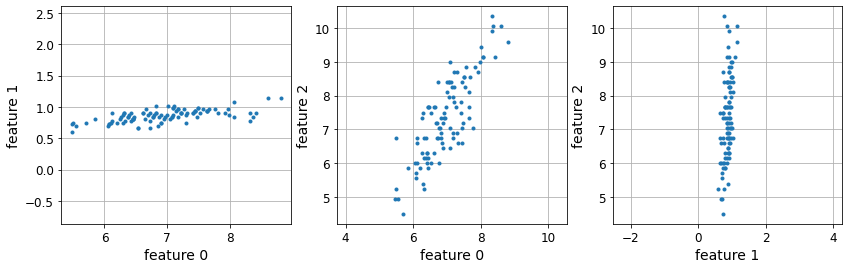

In [10]:
def plot_data_on_axes(X, feat_hor, feat_ver):
    plt.plot(X[:, feat_hor], X[:, feat_ver], '.')
    plt.xlabel(f'feature {feat_hor}')
    plt.ylabel(f'feature {feat_ver}')
    plt.axis('equal')
    plt.grid('on')

def plot_axis_combinations(X):
    plt.subplot(1,3,1)
    plot_data_on_axes(X, feat_hor=0, feat_ver=1)
    
    plt.subplot(1,3,2)
    plot_data_on_axes(X, feat_hor=0, feat_ver=2)

    plt.subplot(1,3,3)
    plot_data_on_axes(X, feat_hor=1, feat_ver=2)
    
plt.figure(figsize=(14,4))
plot_axis_combinations(X)

**Q**: Based on these plots, which of these feature pairs are most strongly correlated?

Answer in the code block below.

In [11]:
# replace the -1s here by the indices (0, 1 or 2) of the two strongest correlated features
#   NOTE: order doesn't matter for this answer
MOST_STRONLGY_CORRELATED_FEATURE_PAIR = (0, 2)

# YOUR CODE HERE
#raise NotImplementedError()

In [12]:
assert(len(MOST_STRONLGY_CORRELATED_FEATURE_PAIR) == 2)
assert(MOST_STRONLGY_CORRELATED_FEATURE_PAIR[0] in (0,1,2))
assert(MOST_STRONLGY_CORRELATED_FEATURE_PAIR[1] in (0,1,2))


### Transforming the data with Principal Component Analysis

The 2D plots give a better picture of the statstical relation between feature pairs, but all of them give you an incomplete picture because they ignore some aspects of the data. With higher dimensional data, there are many more possible feature combinations to explore. And, we can't plot all features in an interactive plot for more the 3 dimensions either.

PCA allows us to find a linear transformation of the data, i.e. by performing a PCA projection we create a  transformed dataset where each feature is a linear combination of the original features.
In the projected representation, the first dimension will capture most of the data variance, and the last dimension the least amount of variance.

By only keeping the first few PCA dimensions, we can thus reduce high dimensional data to a smaller number of dimensions which still contain as much variations in the data as possibly could be kept with a linear transformation.

Use sklearn's PCA implementation to fit and transform the data $X$.
Fow now, just use the default PCA options, don't set any keywords in the constructor.

Remember that most of the intuition and basic usage of sklearn's PCA have been explained in Chapter 8 of the book.

In [13]:
from sklearn.decomposition import PCA
X_pca = None # store the result of the PCA projection of X in this variable

# YOUR CODE HERE
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
#raise NotImplementedError()

In [14]:
assert(X_pca.shape == (100, 3)) # 100 samples, 3 dimensions after projection


As we did with the original data features, determine again how much variance there is in each of the 3 dimensions after PCA transformation, and order these dimensions from most to least variance.

In [15]:
# replace the -1s here and put the numbers 0, 1, 2 in the right order
print("The variance after PCA transformation", np.var(X_pca,axis=0))
PCA_PROJ_ORDER_MOST_TO_LEAST_VARIANCE = [0, 1, 2]
#print(pca.components_[0])
# YOUR CODE HERE
#raise NotImplementedError()

The variance after PCA transformation [1.89728222 0.12421386 0.00590752]


In [16]:
# ensure all numbers 0, 1, 2 occur once in your answer
assert(len(PCA_PROJ_ORDER_MOST_TO_LEAST_VARIANCE) == 3)
assert(np.all(np.bincount(PCA_PROJ_ORDER_MOST_TO_LEAST_VARIANCE) == [1,1,1]))


The data after the PCA project still has 3 dimensions. Therefore, we can again visualize the data using 3D or 2D plots, like before.

interactive(children=(IntSlider(value=45, description='view_angle1', max=90), IntSlider(value=180, description…

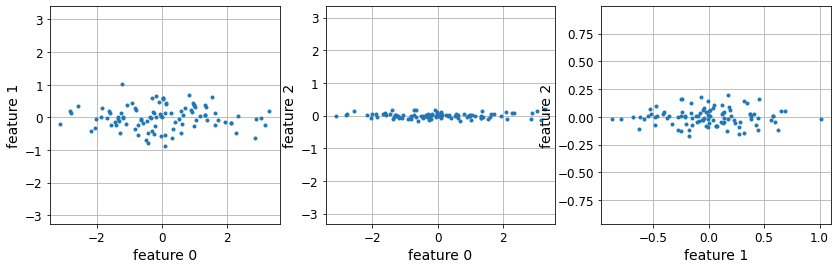

In [17]:
plt.figure(figsize=(14,4))
plot_axis_combinations(X_pca)

# Note: using X_pca here
ipywidgets.interactive(
    lambda view_angle1, view_angle2: plot_3d_data(X_pca, view_angle1, view_angle2, label_name='PCA proj.'),
    view_angle1=(0, 90),
    view_angle2=(0, 360)
)


Notice how the order and variance of each dimension after PCA projection is different from those of the original 3 feature dimensions (compare the data statistics here to those of the original data).

### Visualizing the PCA components

The PCA object has computed two important statistics,
the `mean` of the data in the feature space,
and the `principal components`.
The principal components define a new *orthonormal basis* in the original feature space,
located around the mean of the data.
An orthonormal basis means that the basis vectors are
1. all perpendicular to eachother
2. all have unit length

We can therefore regard it as a translation of the original feature, to subtract the mean, plus a rotation (and possibly with mirroring of some axes, which would just swap the sign in one of the dimensions).

Let's visualize the mean and principal components in the original feature space:

In [18]:
def plot_3d_pca_components(pca, X, view_angle1, view_angle2, label_name='dim'):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')

    # set view angle
    ax.view_init(view_angle1, view_angle2)

    # plot data
    ax.scatter(X[:,0], X[:,1], X[:,2], s=5., alpha=0.3)

    # get the data mean (a 3D vector) from the pca object, and plot it as star
    m = pca.mean_
    ax.plot((m[0],), (m[1],), (m[2],), 'k*', label='mean')
    
    # get each of the 3 pca components from the pca object, and plot it as a vector from the mean
    for c in range(pca.components_.shape[0]):
        comp = pca.components_[c]
        color = 'rgb'[c]
        p1 = m + comp
        ax.plot((m[0], p1[0]), (m[1], p1[1]), (m[2], p1[2]), color+'-', label=f'PCA comp. {c}')
    
    # give all the axes a nice name
    plt.xlabel(label_name+' 0')
    plt.ylabel(label_name+' 1')
    ax.zaxis.set_label_text(label_name+' 2') # no plt.zlabel() :-/
    
    # ensure 3D plot has equally scaled axes
    make_3d_plot_axes_equal(ax)

    plt.legend()
    plt.show()


# make rotatable 3D plot with standard plotting tools
ipywidgets.interactive(
    lambda view_angle1, view_angle2: plot_3d_pca_components(pca, X, view_angle1, view_angle2, label_name='feature'),
    view_angle1=(0, 90),
    view_angle2=(0, 360)
)

interactive(children=(IntSlider(value=45, description='view_angle1', max=90), IntSlider(value=180, description…

Let's implement some tests to show that the computed PCA components (`pca.components_`) indeed form an orthonormal basis. That is

1. complete the function `component_is_unit_length(component)` which only returns True if the given vector `component` has unit length, and returns False otherwise.

2. complete the function `components_are_orthogonal(comp1, comp2)` which only returns True if the two given vectors `comp1` and `comp2` are perpendicular to each other (*Hint*: what should the dot product of two perpendicular vectors be?)

We'll then apply your functions to all PCA components and pairs of components.
Note that for these tests you always need to allow for some small tolerance for small deviations of the desired outout, e.g. in the order of 10^-3 . The calculations of the computer have finite precision, so computed the length vector of a unit vector might actually be 1.000001, for instance.

In [19]:
def component_is_unit_length(component):
    """ Test if the length of a given component is 1.0
        NOTE: you can allow some tolerance to numeric imprecision,
        e.g. you can return True if the length l is between (0.999) < l < (1.001)
        
        Input: component - a vector
        Output: is_unit_length - a boolean (True or False)
    """
    # YOUR CODE HERE
    is_unit_length = False
    length_component = np.linalg.norm(component)
    if (length_component < 1.001 and length_component > 0.999):
        is_unit_length = True 
    #raise NotImplementedError()
    return is_unit_length

def components_are_orthogonal(comp1, comp2):
    """ Test two components are orthogonal.
        NOTE: As in component_is_unit_length(), some tolerance to numeric imprecision is allowed
        
        Input: comp1 - a vector
        Input: comp2 - a vector
        Output: are_orthogonal - a boolean (True or False)
    """
    # YOUR CODE HERE
    are_orthogonal = False
    dot_product = np.vdot(comp1,comp2)
    if (dot_product <0.1 and dot_product > -0.1):
        are_orthogonal = True
    #raise NotImplementedError()
    return are_orthogonal

In [20]:
# Test if each of the 3 PCA components have unit length
for j in range(3):
    comp = pca.components_[j]
    
    # your function is called here
    is_unit_length = component_is_unit_length(comp)
    
    assert(is_unit_length in (False, True))
    print(f'PCA component {j} has unit length:', is_unit_length)

# Test if each pair of PCA components are orthogonal
for j in range(3):
    for k in range(j+1, 3):
        comp1 = pca.components_[j]
        comp2 = pca.components_[k]
        
        # your function is called here
        are_orthogonal = components_are_orthogonal(comp1, comp2)
        
        assert(are_orthogonal in (False, True))
        print(f'PCA components {j} and {k} are orthogonal:', are_orthogonal)

# Some additional checks to make sure these functions perform correctly

# test unit-length and non-unit-length components
comp_x = np.array([1.0, 0.0, 0.0])
comp_y = np.array([0.0, 1.0, 0.0])
assert(components_are_orthogonal(comp_x, comp_y) == True)
assert(components_are_orthogonal(comp_y*3, comp_x*-2) == True)
# no non-zero vector is orthogonal to itself
assert(components_are_orthogonal(comp_x, comp_x) == False)
assert(components_are_orthogonal(comp_y, comp_y) == False)

assert(component_is_unit_length(comp_x) == True)
assert(component_is_unit_length(-comp_y) == True)
assert(component_is_unit_length(comp_x*0.9999) == True) # within tolerance
assert(component_is_unit_length(-comp_y*1.0001) == True) # within tolerance
assert(component_is_unit_length(comp_x*0.99) == False) # outside tolerance
assert(component_is_unit_length(comp_y*1.01) == False) # outside tolerance

PCA component 0 has unit length: True
PCA component 1 has unit length: True
PCA component 2 has unit length: True
PCA components 0 and 1 are orthogonal: True
PCA components 0 and 2 are orthogonal: True
PCA components 1 and 2 are orthogonal: True


### Projecting to lower dimensional spaces

To linearly project the $M$-dimensional data to only $D$-dimensions, i.e. transform $N \times M$ matrix $X$ to a $N \times D$ matrix $X_{pca}$, while maintaining as much variance in the data as possible.
Construct below the following projections:

* `X_pca2` the 2-dimensional PCA embedding of X
* `X_pca1` the 1-dimensional PCA embedding of X

In [21]:
X_pca2 = None
X_pca1 = None

# YOUR CODE HERE
from sklearn.decomposition import PCA

pca2 = PCA(n_components = 2)
pca1 = PCA(n_components = 1)
X_pca2 = pca2.fit_transform(X)
X_pca1 = pca1.fit_transform(X)
#raise NotImplementedError()

print(X_pca2.shape, X_pca1.shape)

(100, 2) (100, 1)


In [22]:
assert(X_pca2.shape == (100,2))
assert(X_pca1.shape == (100,1))


([], <a list of 0 Text major ticklabel objects>)

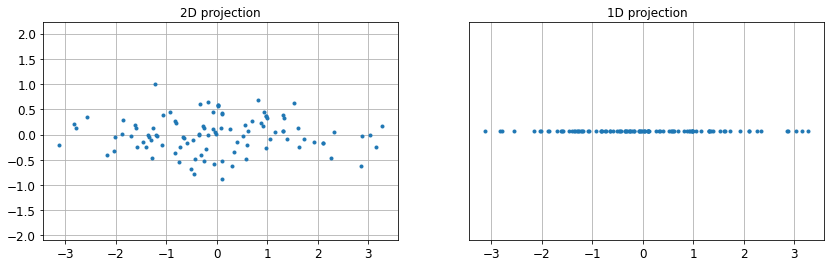

In [23]:
plt.figure(figsize=(14,4))
#plot_axis_combinations(X_pca2_)

plt.subplot(1,2,1)
plt.plot(X_pca2[:,0], X_pca2[:,1], '.')
plt.title('2D projection')
plt.axis('equal')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(X_pca1, np.zeros(X_pca1.shape), '.')
plt.title('1D projection')
plt.axis('equal')
plt.grid('on')
plt.yticks([])


### Back-projecting to the original space

Finally, let's try to reconstruct the data from the PCA projects back in the original $M$-dimensional feature space:

* `X_recon1` should be the back projection from 1-D representation `X_pca1`
* `X_recon2` should be the back projection from 1-D representation `X_pca2`

In [24]:
X_recon1 = None # let this store the 3D reconstruciton after first projecting to a 1D PCA space
X_recon2 = None # let this store the 3D reconstruciton after first projecting to a 2D PCA space

# YOUR CODE HERE
X_recon1 = pca1.inverse_transform(X_pca1)
X_recon2 = pca2.inverse_transform(X_pca2)
#raise NotImplementedError()

In [60]:
assert(X_recon1.shape == X.shape)
assert(X_recon2.shape == X.shape)


We can reuse our earlier plotting functions to show the reconstructed data as a 3D plot,
including the use PCA components.

Note that after back projecting, the data is again 3D, but intrinsically low dimensional as all data points now either lie on a 2D plane or 1D line in the 3D feature space.

In [61]:
print('Reconstruction from 2D PCA')
# make rotatable 3D plot with standard plotting tools
ipywidgets.interactive(
    lambda view_angle1, view_angle2: plot_3d_pca_components(pca2, X_recon2, view_angle1, view_angle2, label_name='feature'),
    view_angle1=(0, 90),
    view_angle2=(0, 360)
)

Reconstruction from 2D PCA


interactive(children=(IntSlider(value=45, description='view_angle1', max=90), IntSlider(value=180, description…

In [62]:
print('Reconstruction from 1D PCA')

# make rotatable 3D plot with standard plotting tools
ipywidgets.interactive(
    lambda view_angle1, view_angle2: plot_3d_pca_components(pca1, X_recon1, view_angle1, view_angle2, label_name='feature'),
    view_angle1=(0, 90),
    view_angle2=(0, 360)
)

Reconstruction from 1D PCA


interactive(children=(IntSlider(value=45, description='view_angle1', max=90), IntSlider(value=180, description…

### Supervised dimensionality reduction


While PCA is an unsupervised approach, since it doesn't consider the class labels,
it is also possible to create a projection that does consider the class labels,
for instance to maximize the kept variance between the classes, rather than the variance of the overall data.

For intance, we could use LDA to learn such as projection. From Chapter 8:
**Linear Discriminant Analysis (LDA)** *is a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane
onto which to project the data. The benefit of this approach is that the projection
will keep classes as far apart as possible, so LDA is a good technique to reduce
dimensionality before running another classification algorithm such as an SVM
classifier.*

While the book doesn't go into detail on how the use LDA, the [sklearn interface for LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis) is very similar to that of PCA for dimensionality reduction.
Similar to PCA, you can set `n_components` in the LDA constructor, and perform fit() and transform() operations. Note that since this is supervised LDA, `n_components` can be at most equal to the number of classes - 1. E.g. in a 2 class problem, we can only find a `n_components=1`-dimensional subspace to best separate these classes.

Use sklearn to create a supervised 1-dimensional LDA projection on the training data $X$, $y$.

In [63]:
X_lda1 = None # X_lda1 will be the result of projecting X with LDA to a 1D space 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Note that you might need to import the LDA implementation from sklearn first

# YOUR CODE HERE
clf = LinearDiscriminantAnalysis(n_components=1)
clf.fit(X, y)
X_lda1 = clf.transform(X)
#raise NotImplementedError()

In [64]:
assert(X_lda1.shape == (100,1))
assert(X_pca1.shape == (100,1))


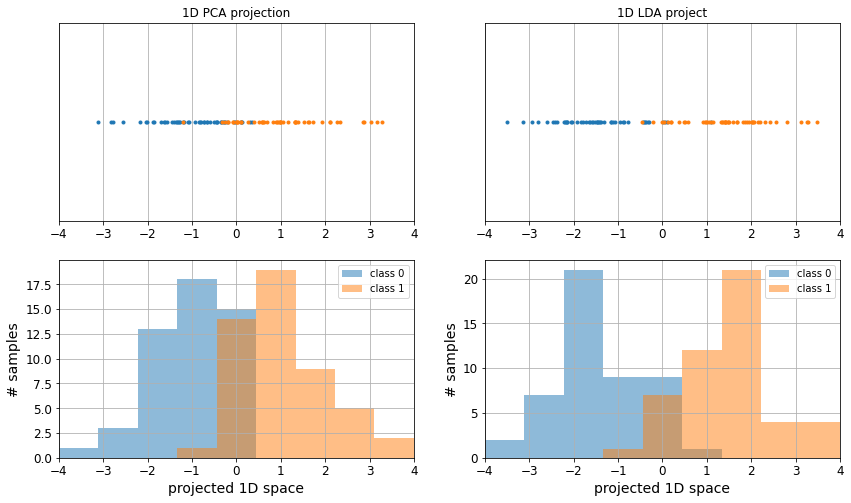

In [65]:
xlims = (-4, 4)

def plot_class_dist_histograms(X_1d, y):
    nbins = 10
    bins = np.linspace(xlims[0], xlims[1], nbins)
    plt.hist(X_1d[y==0], bins, alpha=0.5, label='class 0')
    plt.hist(X_1d[y==1], bins, alpha=0.5, label='class 1')
    #plt.ylim([0., 1.0])
    plt.ylabel('# samples')
    plt.xlabel('projected 1D space')
    plt.legend()

plt.figure(figsize=(14,8))    
plt.subplot(2,2,1)
plt.plot(X_pca1[y==0], np.zeros(X_pca1[y==0].shape), '.')
plt.plot(X_pca1[y==1], np.zeros(X_pca1[y==1].shape), '.')
plt.title('1D PCA projection')
plt.axis('equal')
plt.xlim(xlims)
plt.grid('on')
plt.yticks([])

plt.subplot(2,2,2)
plt.plot(X_lda1[y==0], np.zeros(X_lda1[y==0].shape), '.')
plt.plot(X_lda1[y==1], np.zeros(X_lda1[y==1].shape), '.')
plt.title('1D LDA project')
plt.axis('equal')
plt.xlim(xlims)
plt.grid('on')
plt.yticks([])

plt.subplot(2,2,3)
plot_class_dist_histograms(X_pca1, y)
plt.xlim(xlims)
plt.grid('on')

plt.subplot(2,2,4)
plot_class_dist_histograms(X_lda1, y)
plt.xlim(xlims)
plt.grid('on')


Compare the projected distributions in the plots above for PCA (left column) and LDA (right column). 
Note that the PCA projection doesn't scale the data to preserve the variance, it just defined a new coordinate system in the original space.
The LDA projection on the other hand did scale the data, hence the total variance might appear larger than the PCA variance.

**Q** Which dimensionality reduction method will have a lower Bayes error if you would use the projected data in a 1 dimensional classifier afterwards? Motivate your answer by observations that you make in the plots above.

YOUR ANSWER HERE

## Implement your own PCA

The math behind the standard PCA implementaion is pretty straightforward, and explained in book chapter 8.
Let's verify that your implementation performs the same as sklearn's PCA implementation.

Complete the following functions in the code blocks below:

* `pca_fit(X, n_components)` to estimate the PCA transformation to a `n_component`-dimensional subspace
* `pca_transform(m, components, X)` to apply the PCA transformation to data X
* `pca_inverse_transform(mean, components, X_pca)` to perform the back-projection to the original feature space

These functions will behave similar to sklearn's PCA fit(), transform() and inverse_transform() methods.

In [122]:
# NOTE: don't use any sklearn functions in your own (re)-implementation. You can use np.linalg.svd though.

def pca_fit(X, n_components):
    """ Given an N x D input data matrix `X` containing N data samples in a D dimensional space,
        Compute the parameters of the PCA projection, namely
        - mean: the D-dimensional data mean, and
        - components: a `n_components` x D matrix containing the first `n_components` PCA components
        
        Returns: mean, components
    """
    
    # YOUR CODE HERE
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean
    U, s, Vt = np.linalg.svd(X_centered)
    
    components = np.empty((n_components,X.shape[1]))
    for i in range(n_components):
        components[i] = np.reshape(Vt.T[:,i],(1,X.shape[1]))
    #raise NotImplementedError()
    
    return X_mean, components

In [123]:
n_comp = 2

# run your implementation
mean, components = pca_fit(X, n_components=n_comp)

assert( mean.shape == (3,) ) # mean should be 3D vector
assert( components.shape == (n_comp, 3) ) # each of the n components should be a 3D vector

# -- Comparison to Sklearn's PCA implementation --

pca_ref = PCA(n_components=n_comp)
pca_ref.fit(X)

# First, we'll check if you have the same mean vector
assert(np.all( pca_ref.mean_ == mean ))

# Next, we'll check each of the PCA components in turn
# Note that since the sign of a component is arbitray, so we should ensure that signs are aligned
# before comparing the solutions of different PCA implementations

def is_same_within_tolerance(a, b):
    # test if two vectors are similar, within a small numerical error
    return np.all(np.abs(a - b) < 1e-10)

for c in range(n_comp):
    ref_comp = pca_ref.components_[c]
    your_comp = components[c]
    
    print(f'testing if components {c} is  similar ...')
    print('  sklearn PCA:', ref_comp)
    print('     your PCA:', your_comp)
    
    is_similar = is_same_within_tolerance(ref_comp, your_comp)
    is_similar_mirrored = is_same_within_tolerance(ref_comp, -your_comp) # test with flipped sign
    
    if is_similar:
        print('OK: components are the same')
    elif is_similar_mirrored:
        print('OK: components are the same [only sign is flipped]')
    else:
        print('ERROR: components are the different!')
    print()
    assert(is_similar or is_similar_mirrored)

testing if components 0 is  similar ...
  sklearn PCA: [0.46058143 0.0406653  0.88668545]
     your PCA: [-0.46058143 -0.0406653  -0.88668545]
OK: components are the same [only sign is flipped]

testing if components 1 is  similar ...
  sklearn PCA: [-0.88272351 -0.08377057  0.46236533]
     your PCA: [ 0.88272351  0.08377057 -0.46236533]
OK: components are the same [only sign is flipped]



Next, implement the transformation function that projects data X to the learned PCA space. Use standard numpy functions only, don't use any sklearn functions.

In [124]:
def pca_transform(mean, components, X):
    # YOUR CODE HERE
    X_centered = X - mean
    U, s, Vt = np.linalg.svd(X_centered)
    Wd = Vt.T[:, :np.shape(components)[0]]
    X_embedded = X_centered.dot(Wd)
    #raise NotImplementedError()
    return X_embedded

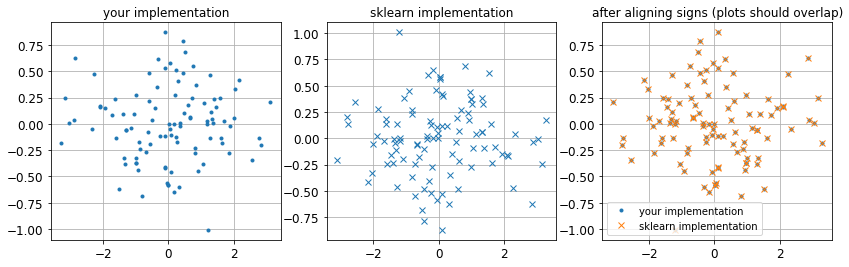

In [125]:
X_pca = pca_ref.transform(X)
X_your_pca = pca_transform(mean, components, X)

assert(X_pca.shape == X_your_pca.shape)

# Let's create a plot of the resulting projections
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(X_your_pca[:,0], X_your_pca[:,1], '.')
plt.title('your implementation')
plt.grid()

plt.subplot(1,3,2)
plt.plot(X_pca[:,0], X_pca[:,1], 'x')
plt.title('sklearn implementation')
plt.grid()

# again, the signs of the projection might be flipped.
#  to ensure that both implementaions use the same sign,
#  we'll flip the sign if the sign of the first element is negative
X_pca_ = X_pca.copy()
X_your_pca_ = X_your_pca.copy()
for c in range(n_comp):
    if X_pca_[0,c] < 0: X_pca_[:,c] = -X_pca_[:,c]
    if X_your_pca_[0,c] < 0: X_your_pca_[:,c] = -X_your_pca_[:,c]


plt.subplot(1,3,3)
plt.plot(X_your_pca_[:,0], X_your_pca_[:,1], '.', label='your implementation')
plt.plot(X_pca_[:,0], X_pca_[:,1], 'x', label='sklearn implementation')
plt.title('after aligning signs (plots should overlap)')
plt.legend()
plt.grid()

# Finally, let's run some asserts to check that the outcomes are indeed the same
assert(np.all(np.abs( X_your_pca_ - X_pca_ ) < 1e-12))

Finally, implement the inverse transformation which projects the points from the embedded PCA space back to the original 3D feature space. Use again standard numpy functions only, don't use any sklearn functions.

In [ ]:
def pca_inverse_transform(mean, components, X_pca):
    # YOUR CODE HERE
    Wd = components
    X_centered = X_pca.dot(Wd.T)
    U, s, Vt = np.linalg.svd(X_centered)
    Wd = Vt.T[:, :np.shape(components)[0]]
    X_reconstruct = X_pca.dot(Wd.T)
    #raise NotImplementedError()
    return X_reconstruct


In [ ]:
# your implementation
X_your_reconstruct = pca_inverse_transform(mean, components, X_your_pca)

# sklearn PCA reference
X_ref_reconstruct = pca_ref.inverse_transform(X_pca)

# solutions the same?
assert( X_ref_reconstruct.shape == X_your_reconstruct.shape )
assert( np.all( np.abs( X_ref_reconstruct - X_your_reconstruct ) < 1e-12 ) )

# visually verify that your code has projected all points to a 2D plane in the original 3D feature space

# Note: using X_your_reconstruct here
ipywidgets.interactive(
    lambda view_angle1, view_angle2: plot_3d_data(X_your_reconstruct, view_angle1, view_angle2, label_name='feat.'),
    view_angle1=(0, 90),
    view_angle2=(0, 360)
)

For any given dataset, the number of possible PCA components is bounded by the number of samples and number of features.
Express this straightforward relationship by completing the following function.

If you don't know the answer, realize that the PCA components are defined by the number of non-zero eigenvalues of the data covariance matrix, e.g. the rank of the covariance matrix. Of course, you could also just experiment with sklearn's implementation and see what works, or look it up somewhere ;)

In [ ]:
def max_possible_PCA_components_for_given_dataset(num_samples, num_features):
    # YOUR CODE HERE
    raise NotImplementedError()
    return max_components


In [ ]:
# Test same sample cases
num_samples = 3
num_features = 3
n_comp = max_possible_PCA_components_for_given_dataset(num_samples, num_features)
print(f'Maximimum number of PCA components for dataset with {num_samples} samples and {num_features} features: {n_comp}')

num_samples = 1000
num_features = 42
n_comp = max_possible_PCA_components_for_given_dataset(num_samples, num_features)
print(f'Maximimum number of PCA components for dataset with {num_samples} samples and {num_features} features: {n_comp}')

num_samples = 300
num_features = 1024
n_comp = max_possible_PCA_components_for_given_dataset(num_samples, num_features)
print(f'Maximimum number of PCA components for dataset with {num_samples} samples and {num_features} features: {n_comp}')


# Eigen-pedestrians

Now that we have explored PCA with some toy data, let's apply it to some real world data.
You are given a dataset containing 1500 gray-scale pedestrian image patches obtained from a driving vehicle.
The $25 \times 50$ pixel images have been reshaped to 1250-dimensional feature vectors.

We start by loading the dataset from disk:

In [ ]:
import scipy.io
data_int = scipy.io.loadmat('data/ped_int.mat')

X_ped = data_int['ped_int']

We first explore the dataset a bit. As we have done in earlier assignments,
it is possible to visualize the feature vectors back as  gray-level intensity images by resizing
them to their original size. 

In [ ]:
IM_HEIGHT = 50
IM_WIDTH = 25

# check we have correcly loaded the data
assert(X_ped.shape[1] == IM_HEIGHT * IM_WIDTH)

def feat_to_image(X):
    return X.reshape(IM_WIDTH, IM_HEIGHT).T

def plot_feat_as_image(X):
    image = feat_to_image(X)
    plt.imshow(image, cmap=mpl.cm.gray)
    plt.axis("off")

def plot_multiple_feats_as_images(X, num_cols=10, suptitle=None):
    plt.figure(figsize=(16,2))
    
    for i in range(num_cols):
        sample = X[i]
        image = feat_to_image(sample)

        plt.subplot(1,num_cols,i+1)
        plt.imshow(image, cmap=mpl.cm.gray)
        plt.title('%d' % i)
        plt.axis('off')
    
    if suptitle:
        plt.suptitle(suptitle)
        
print('Number of training samples:', X_ped.shape[0])
print('        Number of features:', X_ped.shape[1])

plot_multiple_feats_as_images(X_ped, 20, suptitle='First 20 samples')

## PCA on image data

In all these images there is a pedestrian in the center, with some variations in pose, viewpoint, clothing, lighting conditions, background, body size, etc.
We can use PCA to capture the main modes of variation in these images,
similar to what we have done in 3D toy example, but now using 1250 features.


**Q**: How many PCA components could we maximimally compute for this pedestrian dataset?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
print('Maximimum number of PCA components for a pedestrian dataset:')
print(MAX_PCA_COMPONENTS_FOR_PED_DATASET)

assert(type(MAX_PCA_COMPONENTS_FOR_PED_DATASET) == int)


Ok, let's fit a 50-dimensional PCA transformation for this dataset:

In [ ]:
pca = None # store sklearn's PCA object here
X_ped_pca = None # store the PCA projection of X_ped here

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(not pca is None)
assert(X_ped_pca.shape == (1500,50))
sklearn.utils.validation.check_is_fitted(pca) # will throw error if not fitted



Since the features in X represent the intensity values of the individual pixels in the images,
the 1250-dimensional mean feature vector contains the mean intensity value of each pixel over the whole dataset,
and can thus also be visualized as an image.

In [ ]:
plot_feat_as_image(pca.mean_)
plt.title('Mean feature')

Likewise, the PCA components which represent the main axes of variation in the 1250-dimensional dataset can *also* be visualized as images.

We'll refer to these images as the **"Eigen-pedestrians"**, similar to the concept of [Eigenfaces](https://en.wikipedia.org/wiki/Eigenface),
as we can reconstruct pedestrian images from our target distribution very accuratly using only the mean image and a small number of these eigen-pedestrians.

In [ ]:
plot_multiple_feats_as_images(pca.components_, 20, suptitle='First 20 PCA components ("Eigen-pedestrians")')

Note how we can recreate different pedestrian images by taking a linear combinations of these PCA components,
and adding them to the mean

In [ ]:
def plot_show_pca_reconstruction(w0=0, w1=0., w2=0., w3=0., w4=0., w10=0., w18=0.):
    # the indices of the PCA components in this function's arguments
    idxs = np.array([0, 1, 2, 3, 4, 10, 18])
    
    # construct weight vector with given values
    w = np.array([w0, w1, w2, w3, w4, w10, w18])
    
    x = pca.mean_ + w.dot(pca.components_[idxs])
    
    image = feat_to_image(x)
    plt.imshow(image, cmap=mpl.cm.gray) # note. mpl.cm.binary inversts the colors
    plt.axis("off")

wrange = (-1600., 1600.)
ipywidgets.interact(plot_show_pca_reconstruction, w0=wrange, w1=wrange, w2=wrange, w3=wrange, w4=wrange, w10=wrange, w18=wrange)

## Compression

We will now try to see how we can compress the pedestrian images by using only a few Eigen-pedestrians.
Complete the function below which takes the dataset, and a given number of Eigen-pedestrians (PCA components),
and use it to 

1. first compress the data to `n_components` with PCA, and then.
2. reconstruct the images from the compressed representation.


In [ ]:
def compress_and_decompress_with_pca(X_ped, n_components):
    """ Compress and decompress features in dataset X_ped
        by first projecting the data to a PCA subspace with n_components,
        and the reconstructing the data from this PCA embedding.
        
        Input: X_ped - N x M dataset
        Input: n_components - integer, target number of components for compression
        Returns: X_reconstruct - N x M with reconstructed data after compression
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return X_reconstruct

In [ ]:
X_reconstruct = compress_and_decompress_with_pca(X_ped, n_components=20)

# reconstruction should keep the dimensionality of the input
assert(X_reconstruct.shape == X_ped.shape)

# after compression with 0 components, all samples should just be equal to the mena
#  so we should see no variance left in the data
X_reconstruct = compress_and_decompress_with_pca(X_ped, n_components=0)
assert(np.all( X_reconstruct.var(axis=0) < 1e-10))

Now we can below interactivaly visualize the result and see what happens if we increase step by step the number of components from 0 to 1, 2, 3, etc.

In [ ]:
def plot_pca_compression(n_components):
    X_reconstruct = compress_and_decompress_with_pca(X_ped, n_components)

    print(f'num components: {n_components}') 
    plot_multiple_feats_as_images(X_ped, suptitle='original data')
    plot_multiple_feats_as_images(X_reconstruct, suptitle=f'reconstruction with {n_components} PCA components (+ mean)')

ipywidgets.interact(plot_pca_compression, n_components=ipywidgets.IntSlider(0, min=0,max=1250, continuous_update=False))

You should see that especially in the beginning with few components, adding an additional component has a large impact on the reconstruction quality, since these initial components still explain a lot of the variance in the data.

**Q** If we want to lossy compress a dataset $X$ with $N$ samples and a $M$-dimensional feature space, with only $D$ PCA components, how much storage space have we gained?

To compute the compression rate $r$, 
we have to consider
- how many numbers were needed to represent the original data set (i.e. the number of elements in the matrix X), and
- how many numbers are needed to represent the compressed data
- how many numbers are needed to store the "compression information", i.e. the relevant PCA parameters.

In fact, you can use the following formula:
$r = \frac{N(X)}{N(X_{pca}) + m*N(comp) + N(mean)}$

where:
- $N(X)$ is the number of (floating point) numbers in the original data set $X$
- $N(X_{pca})$ is the number of numbers in the PCA compressed data set $X_{pca}$
- $N(comp)$ is the number of (floating point) numbers to represent a single PCA component
- $N(mean)$ is the number of (floating point) numbers to represent the mean feature

In [ ]:
def compute_data_compression_rate(N, M, D):
    # YOUR CODE HERE
    raise NotImplementedError()
    return COMPRESSION_RATIO

In [ ]:
N = 1500
M = 1024
D = 50

COMPRESSION_RATIO = compute_data_compression_rate(N, M, D)
print(f'With {D} PCA components, {N} samples in a {M}-dimensional feature space')
print('can be compressed  by a factor %.2fx' % COMPRESSION_RATIO)

### Explained variance

Let's inspect how the number of PCA components affects the amount of variance in that data that the project keeps,
and verify that the result reported in the PCA object coincides with what we observe in the data.

Complete the two functions below

**Note**: the total variance in the data is defined as the sum of the variance per feature!

In [ ]:
def total_variance_explained_in_pca_projection(pca):
    # YOUR CODE HERE
    raise NotImplementedError()
    return total_variance_ratio

def total_variance_ratio_in_data(X, X_pca):
    """ Compute the ratio of variance in the original data X
        still present in compressed data X_pca:
        
           total-ratio = amount-variance-in-X_pca / amount-variance-in-X
        
        Note that the amount of variance of a dataset X is 
        defined as the sum of the variance of each feature in that data.
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return total_variance_ratio

In [ ]:
variance_explained_predicted = total_variance_explained_in_pca_projection(pca)
variance_explained_observed = total_variance_ratio_in_data(X_ped, X_ped_pca)

print('Ratio of kept variance according to PCA implementation: %.2f' % (variance_explained_predicted*100.))
print('                Observed rato of kept variance in data: %.2f' % (variance_explained_observed*100.))

# these numbers should be identical
assert(abs(variance_explained_observed - variance_explained_observed) < 1e-5)


**Q**: What is the minimum number of PCA components if we want to keep at least 80% of the variance?

In [ ]:
NUMBER_OF_COMPONENTS_NEEDED = -1

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
print('Your answer: at least', NUMBER_OF_COMPONENTS_NEEDED, 'are needed to explain 80% of the variance in the data')


This concludes part 1 on dimensionality reduction and PCA, please continue with part 2 on clustering.